![Course title](./images/title.png)
<i> Alexey Bochkarev </i> | [🌐 www.bochkarev.io](https://www.bochkarev.io) | [✉ a@bochkarev.io](mailto:a@bochkarev.io)

**Discord:** `co05-как-учить-машины-простые-примеры-про-ml`


# ② Logistic regression.

**The problem:** assume we want to predict a yes-or-no answer.

E.g.: we are studying for a DataScience interview, for a certain number of hours $x$, and get either `accepted` ($y=1$) or not ($y=0$) to the job.

In [1]:
import pandas as pd

df = pd.read_csv("./int_data.csv")
df.head(10)

,Candidate,HRS,RESULT
0,0,10,1
1,1,-6,0
2,2,3,0
3,3,0,0
4,4,-5,0
5,5,7,1
6,6,5,1
7,7,-10,0
8,8,-4,0
9,9,3,1


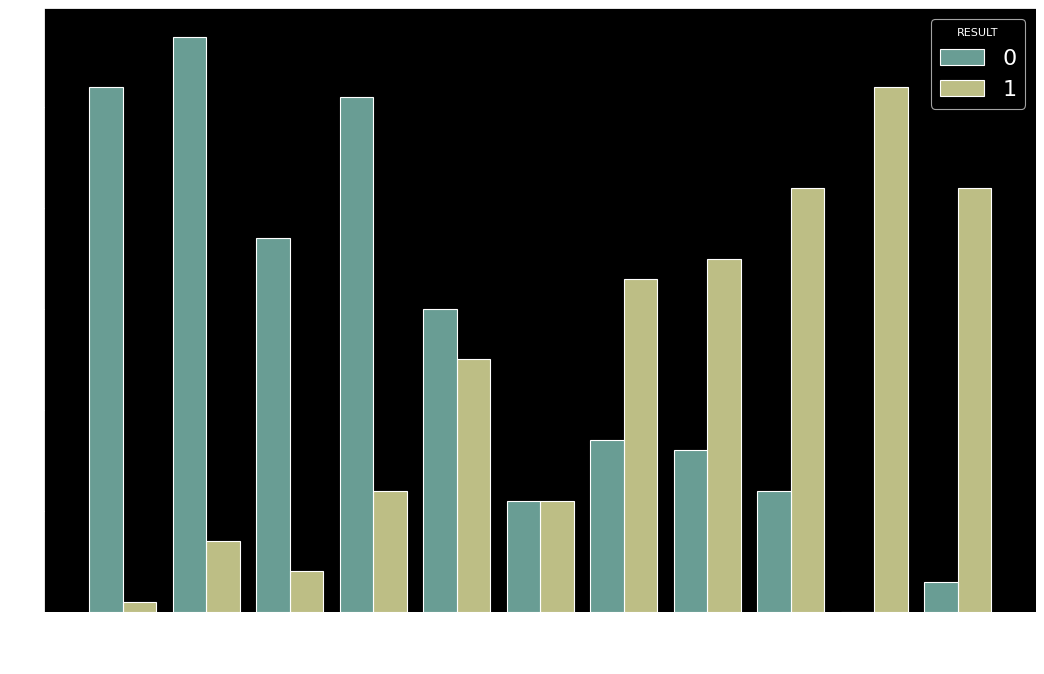

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background"); plt.rc('legend',fontsize=20)

plt.figure(figsize=(16, 10), dpi= 80)
plt.xlabel("Hours studied", fontsize=22);plt.xticks(fontsize=15)
sns.histplot(df, x='HRS', hue='RESULT',
             multiple='dodge', shrink=.8);
plt.show()

## So, first: how to predict a binary fact?

Right, let's predict "likelohood". 

To do that, check out **sigmoid** function:

$$\LARGE \sigma(t) = \frac{e^t}{1+e^t} = \frac{1}{e^{-t}+1}$$

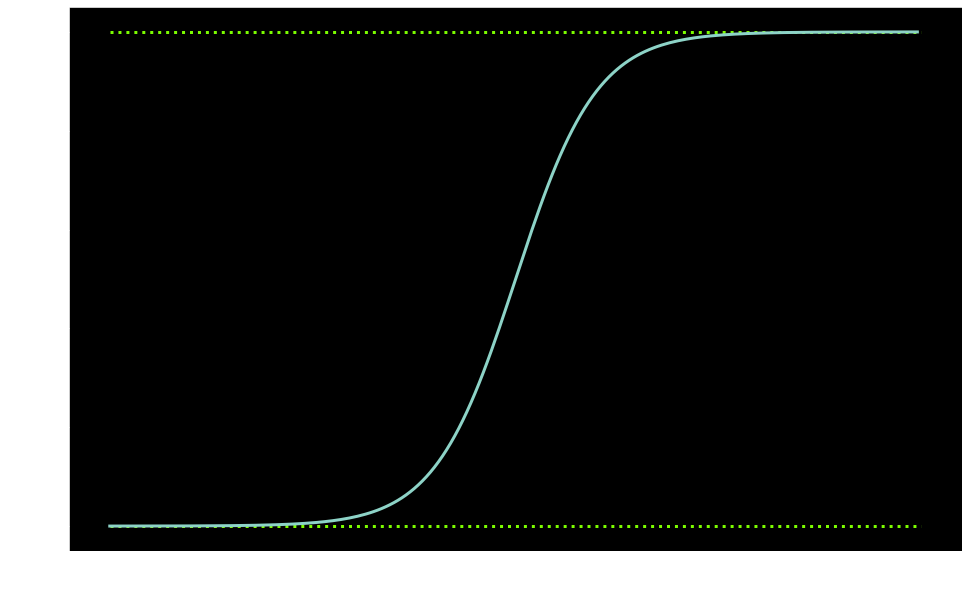

In [3]:
from math import exp
T = [t/10 for t in range (-100,100)]; S = [exp(t)/(1+exp(t)) for t in T]
plt.figure(figsize=(16, 10)); plt.xlabel("t", fontsize=20); plt.xticks(fontsize=20);
plt.ylabel("σ(t)", fontsize=20); plt.yticks(fontsize=20)
plt.hlines(xmin=-10, xmax=10, y=[0,1.0], color='lawngreen', linestyle=":", linewidth=3.0); 
plt.plot(T,S, linewidth=3.0); plt.show()

Let us define a model like this:

$$\LARGE P(y=1) = \frac{1}{1+e^{-\beta x}}$$

Then, *Odds* is:

$$\LARGE \textrm{Odds}=\frac{P(y=1)}{P(y=0)} = \frac{P(y=1)}{1-P(y=1)} = e^{\beta x}$$

And so, we have something called *Logit*:

$$\LARGE \log(\textrm{Odds}) = \beta x$$

Now, what did we do last time?

 $\rightarrow$ we defined *loss function*, i.e., the problem to minimize.
 
 Let's try to develop the same idea, from a slightly different angle.

Define "Likelihood" to get what we've got, assuming our $\beta$ value.

For $y = (0, 0, 0, 1, 1, \ldots)$ we will have:
$$\LARGE L = (1-\hat{p_1})(1-\hat{p_2})(1-\hat{p_3})\hat{p_4}\hat{p_5}\ldots$$

# >>> COMMERCIAL BREAK >>>

## Probability Theory course!

![Dice](./images/dice.png)

Define "Likelihood" to get what we've got, assuming our $\beta$ value.

For $y = (0, 0, 0, 1, 1, \ldots)$ we will have:
$$\LARGE L = (1-\hat{p_1})(1-\hat{p_2})(1-\hat{p_3})\hat{p_4}\hat{p_5}\ldots$$

That is scary, so let us reformulate:

$$\Large \log L = \log(1-\hat{p_1}) + \log (1-\hat{p_2}) + \log(1-\hat{p_3}) + 
\log \hat{p_4} + \log \hat{p_5}\ldots$$

In fact, we are saying that the terms above work as follows:
- if $y_k = 1 \rightarrow \log \hat{p_k}$,
- if $y_k = 0 \rightarrow \log (1-\hat{p_k})$,

So we can just put each term in a uniform way, like:
$$\Large y_k \log \hat{p_k} + (1-y_k)\log (1-\hat{p_k})$$

Recalling that $p_k = 1/(1+e^{-\beta x})$, we have:

$$\Large \log L = \ldots - y_k \log (1+e^{-\beta x_k}) - (1-y_k) \log(1+e^{\beta x}) - \ldots $$

... and that's a relatively simple function of $\beta$ (if we fix $x$ -s):

In [4]:
from math import log

def L(X, Y, beta):
    return -sum([
        Y[k]*log(1+exp(-beta*X[k]))+
        (1-Y[k]) * log(1+exp(beta*X[k]))
    for k in range(len(X))])

### Let's have some practice then.
Let's get back to our DataScience interviews.

First, split the dataset into training vs testing.

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 50)

In [6]:
X_train = [h for h in df_train['HRS']]
Y_train = [r for r in df_train['RESULT']]

Now, we can calculate a "grid" of loss values (i.e., a "loss"/"likelihood" value for each value of $\beta$.

In [7]:
B = [0.1 + (0.6 - 0.1)*b/3000 for b in range(3000)]
Ls = [L(X_train, Y_train, b) for b in B]

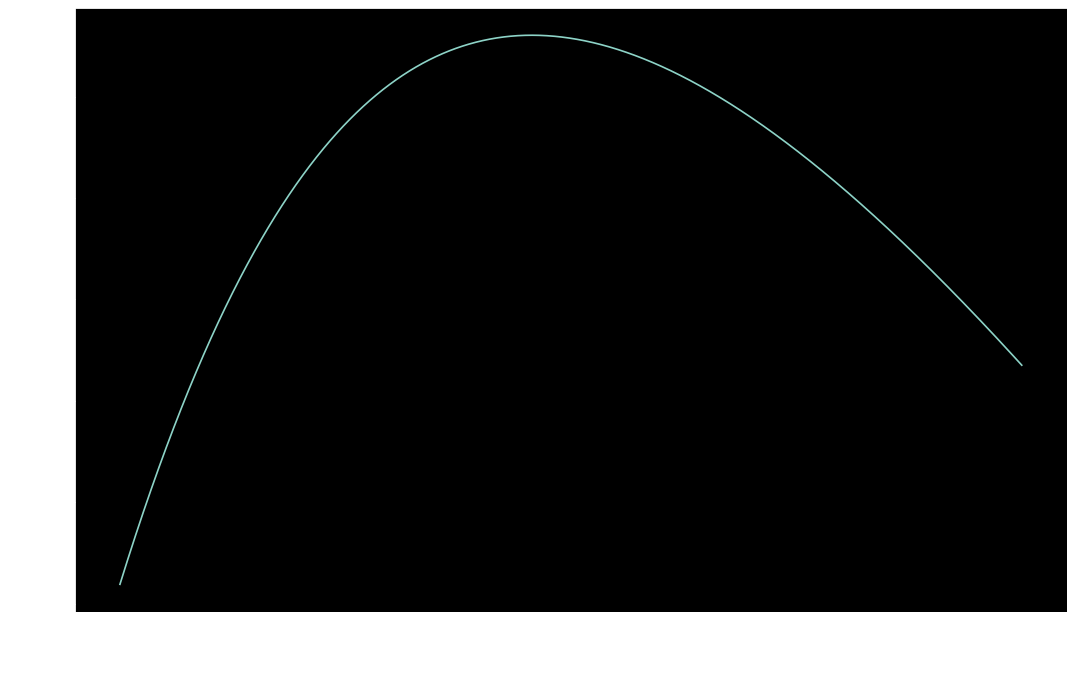

In [8]:
plt.figure(figsize=(16, 10), dpi= 80); plt.plot(B,Ls); 
plt.xlabel("Values for β", fontsize=22); plt.ylabel("log L", fontsize=22)
plt.xticks(fontsize=15)
plt.show();

### A big question: how to find $\beta^*$ now?

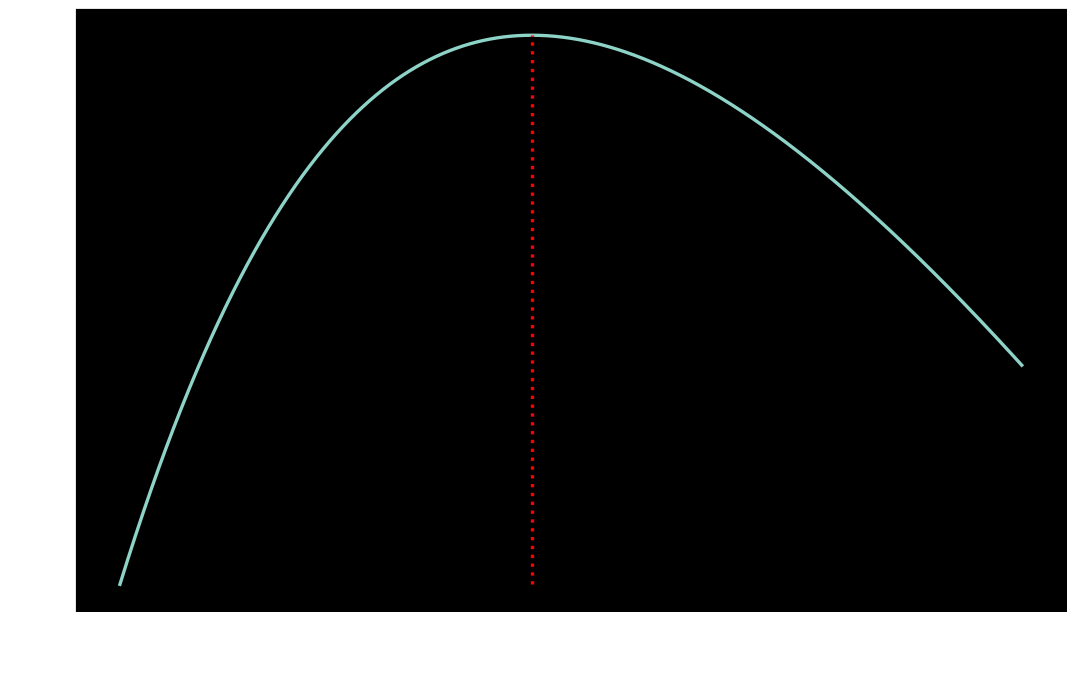

In [9]:
# Let's just find beta-star :-)
import numpy as np

bi_best = np.argmax(Ls)
beta_star = B[bi_best]

plt.figure(figsize=(16, 10), dpi= 80); plt.plot(B,Ls, linewidth=3.0); 
plt.xlabel("Values for β", fontsize=22); plt.ylabel("log L", fontsize=22)
plt.xticks(fontsize=15)

plt.vlines(ymin=min(Ls), ymax=max(Ls), x=beta_star, color='red', linestyle=':', linewidth=3.0)
plt.show();

Again, let's cross-check with `sklearn`.

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=False, penalty='none')
model.fit([[x] for x in df['HRS']], df['RESULT'])

print(f"Coefficient values:")
print(f"\__ calculated by hand: {beta_star:.8f}")
print(f"\__ got from sklearn  : {model.coef_[0][0]:.8f}")

Coefficient values:
\__ calculated by hand: 0.32833333
\__ got from sklearn  : 0.32518874


### Let's pause and think (briefly): how did we do this?

# >>> COMMERCIAL BREAK >>>

## Calculus, Numerical methods...

ah, never mind...

### Okay, now we have this kind of model:

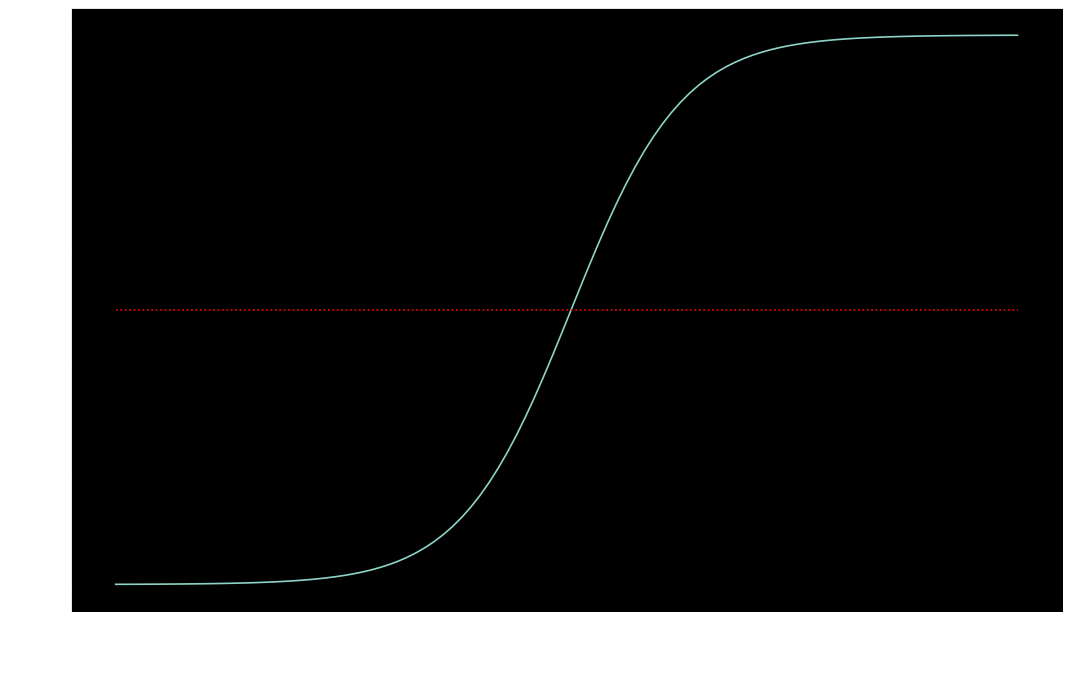

In [11]:
H = [j/2 for j in range(-50, 50)]
Ps = [1/(1+exp(-beta_star*h)) for h in H]
plt.figure(figsize=(16, 10), dpi= 80);
plt.xlabel("Hours studied", fontsize=22); plt.ylabel("Prob. to pass", fontsize=22)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.plot(H, Ps)
plt.hlines(xmin=min(H), xmax=max(H), y=0.5, color='red', linestyle=':')

In [12]:
1/(1+exp(-beta_star*5))

0.8377615934696465

In [13]:
model.predict_proba([[5]])

array([[0.16438679, 0.83561321]])

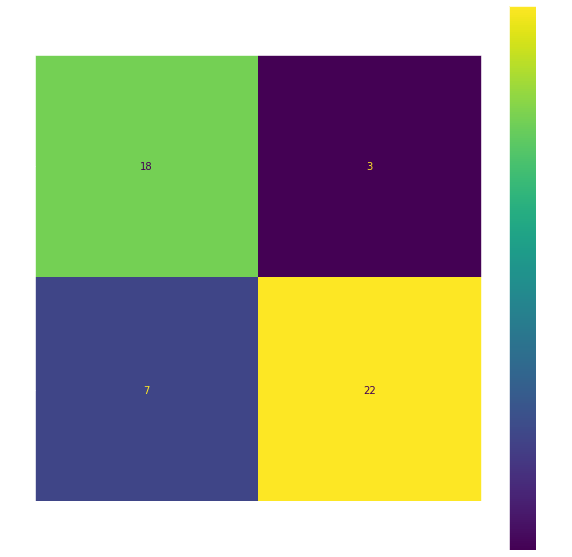

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_test['RESULT'], model.predict([[h] for h in df_test['HRS']]))
_, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay(cm).plot(ax=ax);plt.show()

## Example: Framingham heart study
See e.g., [Wiki](https://en.wikipedia.org/wiki/Framingham_Heart_Study)

The data are available, e.g., from [Kaggle](https://www.kaggle.com/datasets/5d359d0259d8325396aff882594f0c59e5e0c3da49c5bf4df3c23121109b4955)

In [15]:
dfh = pd.read_csv("CHD-data.csv")
dfh = dfh.dropna(axis=0)
dfh.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Let's split data into training and test subsets:

In [16]:
dfh_train, dfh_test = train_test_split(dfh, test_size = 0.3,
                                      stratify=dfh.TenYearCHD)
len(dfh_train)

2893

In [17]:
# for all columns:
# selected_cols = [col for col in dfh.columns if col != "TenYearCHD"]]
selected_cols = ["age", "male", "sysBP", "diabetes", "currentSmoker"]
dfh_X_train = dfh_train[selected_cols]
dfh_Y_train = dfh_train['TenYearCHD']

We'll do the regression with `statsmodels.api` package this time:

In [18]:
import statsmodels.api as sm

fhm = sm.Logit(dfh_Y_train, sm.add_constant(dfh_X_train)).fit()
print(fhm.summary())

Optimization terminated successfully.
         Current function value: 0.376333
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2893
Model:                          Logit   Df Residuals:                     2887
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1173
Time:                        10:03:01   Log-Likelihood:                -1088.7
converged:                       True   LL-Null:                       -1233.3
Covariance Type:            nonrobust   LLR p-value:                 2.079e-60
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.3416      0.460    -18.141      0.000      -9.243      -7.440
age               0.

### Let's test it now!

In [19]:
dfh_Y_test = dfh_test["TenYearCHD"]
dfh_X_test = sm.add_constant(dfh_test[selected_cols])
dfh_test_pred = fhm.predict(dfh_X_test);
dfh_test_pred

2488    0.036634
693     0.204251
2426    0.088195
2210    0.091242
3352    0.084463
          ...   
3493    0.034654
1745    0.199877
2805    0.109961
3967    0.123933
3908    0.129837
Length: 1240, dtype: float64

We can make predictions as follows:

In [22]:
threshold = 0.35
dfh_Y_test_predicted = (dfh_test_pred > threshold)
dfh_Y_test_predicted

2488    False
693     False
2426    False
2210    False
3352    False
        ...  
3493    False
1745    False
2805    False
3967    False
3908    False
Length: 1240, dtype: bool

Usually it is handy to think in terms of this matrix then:

## Confusion matrix

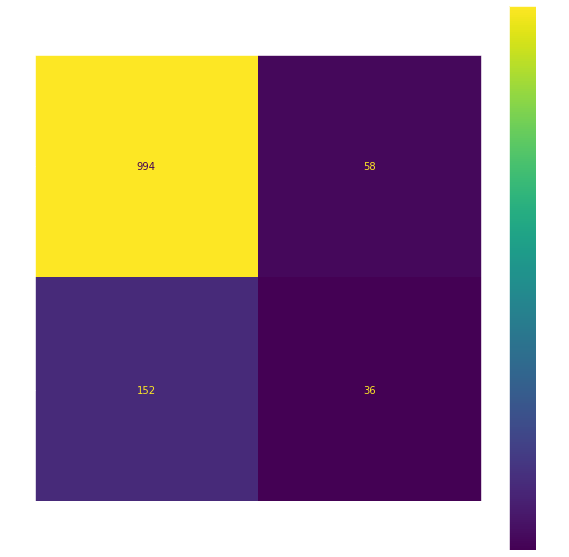

In [23]:
cm = confusion_matrix(dfh_Y_test, dfh_Y_test_predicted)
_, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay(cm).plot(ax=ax);plt.show()

# Wrap-up
- We created a model to predict a binary outcome -- a yes/no (in fact, "probability")
- Again, we used the idea of minimizing some "loss" (or maximizing some "goodness")
- In this case, we optimized it numerically to find target parameters
- A few words about testing (train vs test data split, confusion matrix, tresholds, ...)